# 📧 SMS Spam Classification (Text Classification - NLP)

### 🎯 Objective
Build a machine learning model that can classify SMS messages as either **Spam** or **Ham (Not Spam)** using natural language processing techniques.


In [ ]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## 📦 Step 1: Dataset Overview

We will use the **SMS Spam Collection Dataset** from the UCI repository.

- It contains ~5,500 SMS messages.
- Each message is labeled as either:
  - `ham` (non-spam)
  - `spam`

The dataset typically has two columns:
- **Label**: Target variable (`ham` or `spam`)
- **Message**: The actual text of the SMS

In [4]:
# Step 2: Load and explore dataset

# Load your dataset (replace with actual path if needed)
df = pd.read_csv('/content/drive/MyDrive/Data Sets for Codveda Technologies/Sentiment dataset.csv')

# Display first few rows
df = df[['Text', 'Sentiment']]  # Ensure correct column names
df.head()


,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


## 🧹 Step 2: Text Preprocessing

Before feeding text into a machine learning model, we must clean and prepare it. Text data is unstructured and needs to be converted into a numerical form. Preprocessing helps in:
- Removing noise
- Standardizing the text
- Reducing vocabulary size

### 🔽 1. Lowercasing
Convert all characters to lowercase so that words like “Free” and “free” are treated the same.

### ✂️ 2. Removing Punctuation
Remove punctuation marks such as `.`, `,`, `!`, `?` which don’t add value to meaning but increase noise.

### 🔪 3. Tokenization
Break down each message into individual words (tokens). For example:
> `"Free offer just for you"` → `["Free", "offer", "just", "for", "you"]`

### 🚫 4. Stopword Removal
Remove very common words that don’t carry much meaning (e.g., “is”, “the”, “you”). These are known as **stopwords**.

### 🔁 5. Stemming
Reduce each word to its base form (e.g., "loved", "loving" → "love"). This helps group similar words and reduces dimensionality.


In [5]:
# Step 3: Preprocess Text

# Define a simple text cleaning function
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # remove stopwords & stem
    return " ".join(words)

df['cleaned_text'] = df['Text'].apply(preprocess_text)
df[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,Enjoying a beautiful day at the park! ...,enjoy beauti day park
1,Traffic was terrible this morning. ...,traffic terribl morn
2,Just finished an amazing workout! 💪 ...,finish amaz workout 💪
3,Excited about the upcoming weekend getaway! ...,excit upcom weekend getaway
4,Trying out a new recipe for dinner tonight. ...,tri new recip dinner tonight


## 🔢 Step 3: Convert Text to Numbers

Since machine learning models can't understand raw text, we need to convert it to a numerical format. Two common methods:

### 1. **Bag of Words (BoW)**
- Represents each message as a vector of word counts.
- Simple, but doesn’t consider word importance or context.

### 2. **TF-IDF (Term Frequency - Inverse Document Frequency)**
- Assigns weights to words based on how frequently they appear in a message **and** how unique they are across all messages.
- Words that occur frequently across all messages get **lower weight**.

We'll use **TF-IDF** in this task as it balances frequency and uniqueness well.


In [6]:
# Step 4: TF-IDF Vectorization

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])  # features
y = df['Sentiment']  # labels


## 🤖 Step 4: Model Training

Now that our messages are converted into numerical vectors, we can train a classification model.

### Common Models:
- **Naive Bayes** (fast, good with text)
- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Random Forest**

We'll use **Multinomial Naive Bayes**, which is ideal for discrete features like word counts or TF-IDF scores.


In [7]:
# Step 5: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train Logistic model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 📊 Step 5: Model Evaluation

We need to evaluate how well the model performs using classification metrics:

### 1. **Accuracy**  
What proportion of total predictions were correct?

### 2. **Precision**  
Of all messages predicted as spam, how many were actually spam?

### 3. **Recall**  
Of all actual spam messages, how many were correctly identified?

### 4. **F1-Score**  
A balance between precision and recall. Useful when data is imbalanced.


Classification Report:
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0.00         1
         Bitter              0.00      0.00      0.00         1
           Bitte

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


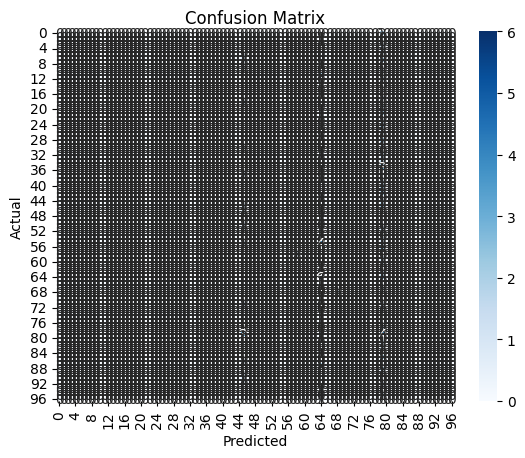

In [9]:
# Step 7: Make Predictions and evaulate

y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ✅ Summary

Through preprocessing, vectorization, model training, and evaluation — we can build a robust system to classify SMS messages into spam and ham. Next, we’ll implement each of these steps in code.